<a href="https://colab.research.google.com/github/islahmun/MachineLearning-BentukTangan/blob/master/bentuk_tangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
print(tf.__version__)

2.2.0


In [11]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-19 11:10:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.80MB/s    in 45s     

2020-05-19 11:11:32 (6.82 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()
#shutil.rmtree('/tmp/training/rockpaperscissors/rps-cv-images')


In [0]:
base_dir = '/tmp/training/rockpaperscissors/rps-cv-images'
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')
train_dir = "/tmp/training/rockpaperscissors/rps-cv-images"
validation_dir = "/tmp/training/rockpaperscissors/rps-cv-images/"

In [0]:
os.listdir('/tmp/training/rockpaperscissors/rps-cv-images/scissors')

In [0]:
os.listdir('/tmp/training/rockpaperscissors/rps-cv-images/rock')

In [59]:
os.listdir('/tmp/training/rockpaperscissors/rps-cv-images/')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [0]:
print(train_dir)


In [0]:
# membuat direktori ruangan rapi pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori ruangan rapi pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',                    
                    validation_split = 0.2)

In [32]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(200, 200),
        batch_size=4,
        class_mode='categorical',
        subset = 'training' )
validation_generator = test_datagen.flow_from_directory(
        base_dir,
        target_size=(200, 200),
        batch_size=4,
        class_mode='categorical',
        subset = 'validation')


Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),softmax
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [63]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=3,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)


Epoch 1/10
25/25 - 10s - loss: 0.5140 - accuracy: 0.8400 - val_loss: 0.6495 - val_accuracy: 0.8333
Epoch 2/10
25/25 - 9s - loss: 0.3794 - accuracy: 0.8800 - val_loss: 0.3747 - val_accuracy: 0.8333
Epoch 3/10
25/25 - 9s - loss: 0.5034 - accuracy: 0.8500 - val_loss: 0.2237 - val_accuracy: 0.9167
Epoch 4/10
25/25 - 10s - loss: 0.2792 - accuracy: 0.8900 - val_loss: 0.1413 - val_accuracy: 0.9167
Epoch 5/10
25/25 - 9s - loss: 0.4126 - accuracy: 0.8800 - val_loss: 0.4505 - val_accuracy: 0.8333
Epoch 6/10
25/25 - 10s - loss: 0.3272 - accuracy: 0.8800 - val_loss: 0.3696 - val_accuracy: 0.8889
Epoch 7/10
25/25 - 10s - loss: 0.4472 - accuracy: 0.8900 - val_loss: 0.2766 - val_accuracy: 0.9167
Epoch 8/10
25/25 - 10s - loss: 0.2260 - accuracy: 0.9000 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoch 9/10
25/25 - 9s - loss: 0.2515 - accuracy: 0.9200 - val_loss: 0.1528 - val_accuracy: 1.0000
Epoch 10/10
25/25 - 10s - loss: 0.3432 - accuracy: 0.9000 - val_loss: 0.1788 - val_accuracy: 0.9167


Saving 5yHTRIIDcdrXqMYJ.png to 5yHTRIIDcdrXqMYJ.png
[[0.0000000e+00 4.1686044e-16 0.0000000e+00]]
1
rock


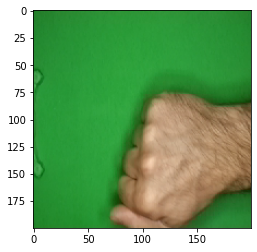

In [92]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)
  
  #print(fn)
  print(classes)
  print(result)
  if result == 0:
    print('paper')
  elif result == 1:
    print('rock')
  elif result == 2:
    print('siccors')